#    Exploratory Data Analysis (EDA) and Machine Learning Model Applications of Telco-Customer Dataset

<a id=section101></a> 
### 1. Introduction

<a id=section2></a> 
### 2. Load the packages and data 

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")
#import lux

<a id=section3></a> 
### 3. Data Profiling

In [2]:
# Read Dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
# Review the data types and sample data to understand what variables we are dealing with?
# Which variables need to be transformed in some way before they can be analyzed?
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# DataFrame has 5 rows and 21 columns

In [5]:
df.isnull().sum() # Display the sum of null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.info() # Display the data type for each variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.dtypes # Display the data type for each variable

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.describe()  # Descriptive statistics for the numerical variables

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


### 4. Observations

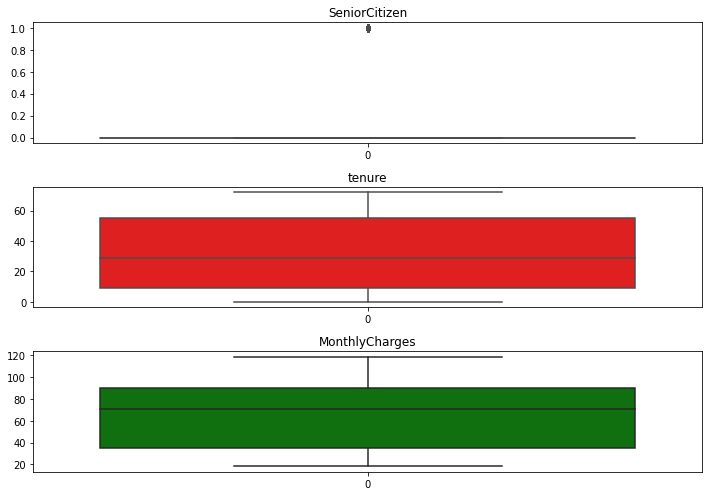

In [10]:
fig, ax = plt.subplots(3, 1, figsize=(10,7))
ax[0].set_title("SeniorCitizen")
ax[1].set_title("tenure")
ax[2].set_title("MonthlyCharges")
sns.boxplot(data = df.SeniorCitizen, orient="v", ax=ax[0], color = "b")
sns.boxplot(data = df.tenure, orient="v", ax=ax[1], color = "r")
sns.boxplot(data = df.MonthlyCharges, orient="v", ax=ax[2], color = "g")
plt.tight_layout()

In [11]:
for i in df.columns:
    print(df[i].value_counts())
    print("---------------------------------------------------------------------------------------------")
    

7010-ZMVBF    1
9917-KWRBE    1
1936-CZAKF    1
3420-ZDBMA    1
2683-BPJSO    1
             ..
1163-VIPRI    1
4950-HKQTE    1
6840-RESVB    1
5630-IXDXV    1
1666-JZPZT    1
Name: customerID, Length: 7043, dtype: int64
---------------------------------------------------------------------------------------------
Male      3555
Female    3488
Name: gender, dtype: int64
---------------------------------------------------------------------------------------------
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
---------------------------------------------------------------------------------------------
No     3641
Yes    3402
Name: Partner, dtype: int64
---------------------------------------------------------------------------------------------
No     4933
Yes    2110
Name: Dependents, dtype: int64
---------------------------------------------------------------------------------------------
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
3

<a id=section307></a> 
### 5. Data Processing 

- Variables to transform prior to analysis:
    - Standardize all column headers to lower case (to prevent typos!)
    - Resolve duplicate records
    - Split Combination of multiple columns
    - We will need to decide how to handle Null values.
    

   <a id=section403></a>
   
   
   
   ### 5.1. Missing data and its imputation

In [12]:
df = df.drop(labels="customerID", axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [14]:
# df[["TotalCharges"]] = df[["TotalCharges"]].apply(pd.to_numeric)
# Although there are numeric values in the total charges column, it appears as an object.

In [15]:
a = df[df["TotalCharges"] == " "].index
a

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [16]:
df.drop(index = a, inplace = True)

In [17]:
df[["TotalCharges"]] = df[["TotalCharges"]].apply(pd.to_numeric)

In [18]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [19]:
selection = ["tenure","MonthlyCharges","OnlineSecurity","TotalCharges","InternetService","TechSupport","Contract"]

X = df[selection]
y = pd.DataFrame(df["Churn"], columns = ["Churn"])

In [20]:
X_out = X.copy()

In [60]:
X_out

,tenure,MonthlyCharges,OnlineSecurity,TotalCharges,InternetService,TechSupport,Contract
0,1,29.85,No,29.85,DSL,No,Month-to-month
1,34,56.95,Yes,1889.50,DSL,No,One year
2,2,53.85,Yes,108.15,DSL,No,Month-to-month
3,45,42.30,Yes,1840.75,DSL,Yes,One year
4,2,70.70,No,151.65,Fiber optic,No,Month-to-month
...,...,...,...,...,...,...,...
7038,24,84.80,Yes,1990.50,DSL,Yes,One year
7039,72,103.20,No,7362.90,Fiber optic,No,One year
7040,11,29.60,Yes,346.45,DSL,No,Month-to-month
7041,4,74.40,No,306.60,Fiber optic,No,Month-to-month


In [21]:
X = pd.get_dummies(X)

In [22]:
X.head()

,tenure,MonthlyCharges,TotalCharges,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,29.85,29.85,1,0,0,1,0,0,1,0,0,1,0,0
1,34,56.95,1889.50,0,0,1,1,0,0,1,0,0,0,1,0
2,2,53.85,108.15,0,0,1,1,0,0,1,0,0,1,0,0
3,45,42.30,1840.75,0,0,1,1,0,0,0,0,1,0,1,0
4,2,70.70,151.65,1,0,0,0,1,0,1,0,0,1,0,0


In [23]:
y.head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


In [24]:
df1 = pd.concat([X,y], axis=1)
df1.head()

,tenure,MonthlyCharges,TotalCharges,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Churn
0,1,29.85,29.85,1,0,0,1,0,0,1,0,0,1,0,0,No
1,34,56.95,1889.50,0,0,1,1,0,0,1,0,0,0,1,0,No
2,2,53.85,108.15,0,0,1,1,0,0,1,0,0,1,0,0,Yes
3,45,42.30,1840.75,0,0,1,1,0,0,0,0,1,0,1,0,No
4,2,70.70,151.65,1,0,0,0,1,0,1,0,0,1,0,0,Yes


In [25]:
df1["Churn"] = df1["Churn"].apply(lambda x: 1 if x == "Yes" else 0)

In [26]:
df1

,tenure,MonthlyCharges,TotalCharges,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Churn
0,1,29.85,29.85,1,0,0,1,0,0,1,0,0,1,0,0,0
1,34,56.95,1889.50,0,0,1,1,0,0,1,0,0,0,1,0,0
2,2,53.85,108.15,0,0,1,1,0,0,1,0,0,1,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,0,0,0,1,0,1,0,0
4,2,70.70,151.65,1,0,0,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,0,0,1,1,0,0,0,0,1,0,1,0,0
7039,72,103.20,7362.90,1,0,0,0,1,0,1,0,0,0,1,0,0
7040,11,29.60,346.45,0,0,1,1,0,0,1,0,0,1,0,0,0
7041,4,74.40,306.60,1,0,0,0,1,0,1,0,0,1,0,0,1


In [30]:
df1 = df1.reset_index(drop = True)
df1

,tenure,MonthlyCharges,TotalCharges,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Churn
0,1,29.85,29.85,1,0,0,1,0,0,1,0,0,1,0,0,0
1,34,56.95,1889.50,0,0,1,1,0,0,1,0,0,0,1,0,0
2,2,53.85,108.15,0,0,1,1,0,0,1,0,0,1,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,0,0,0,1,0,1,0,0
4,2,70.70,151.65,1,0,0,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,24,84.80,1990.50,0,0,1,1,0,0,0,0,1,0,1,0,0
7028,72,103.20,7362.90,1,0,0,0,1,0,1,0,0,0,1,0,0
7029,11,29.60,346.45,0,0,1,1,0,0,1,0,0,1,0,0,0
7030,4,74.40,306.60,1,0,0,0,1,0,1,0,0,1,0,0,1


# SMOOTE

In [39]:
X = df1.drop("Churn", axis = 1)
y = df1["Churn"]

In [41]:
print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

sm = SMOTE(random_state=2)
X_sm, y_sm = sm.fit_sample(X, y.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_sm.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_sm.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_sm==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_sm==0)))

Before OverSampling, counts of label '1': 1869
Before OverSampling, counts of label '0': 5163 

After OverSampling, the shape of train_X: (10326, 15)
After OverSampling, the shape of train_y: (10326,) 

After OverSampling, counts of label '1': 5163
After OverSampling, counts of label '0': 5163


In [42]:
X_sm

,tenure,MonthlyCharges,TotalCharges,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,29.850000,29.850000,1,0,0,1,0,0,1,0,0,1,0,0
1,34,56.950000,1889.500000,0,0,1,1,0,0,1,0,0,0,1,0
2,2,53.850000,108.150000,0,0,1,1,0,0,1,0,0,1,0,0
3,45,42.300000,1840.750000,0,0,1,1,0,0,0,0,1,0,1,0
4,2,70.700000,151.650000,1,0,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10321,16,98.498715,1586.870996,1,0,0,0,1,0,1,0,0,1,0,0
10322,28,90.658769,2711.369814,1,0,0,0,1,0,1,0,0,1,0,0
10323,12,49.723279,594.114222,0,0,0,1,0,0,0,0,1,1,0,0
10324,1,75.300000,75.300000,1,0,0,0,1,0,1,0,0,1,0,0


In [44]:
y_sm.shape

(10326,)

In [45]:
rf_out = RandomForestClassifier(  max_features='sqrt',
                                    max_depth = 5, 
                                    #max_features = 8, 
                                    min_samples_leaf = 4,
                                    min_samples_split = 3, 
                                    n_estimators = 300)
rf_out.fit(X_sm, y_sm)

RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=3, n_estimators=300)

In [47]:
import pickle
with open("model_out.pkl", 'wb') as file:  
    pickle.dump(rf_out, file)

In [48]:
Churn_Probablity = rf_out.predict_proba(X_sm)

In [49]:
Churn_Probablity

array([[0.26667073, 0.73332927],
       [0.82623455, 0.17376545],
       [0.42858089, 0.57141911],
       ...,
       [0.4934595 , 0.5065405 ],
       [0.14649325, 0.85350675],
       [0.16983484, 0.83016516]])

In [50]:
Churn_Predict = rf_out.predict(X_sm)

In [51]:
Churn_Predict

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [52]:
Churn_Probablity.shape

(10326, 2)

In [78]:
df2 = pd.DataFrame(Churn_Probablity[:,1], columns = ["Churn Probability"])

In [79]:
df2

,Churn Probability
0,0.733329
1,0.173765
2,0.571419
3,0.137526
4,0.834388
...,...
10321,0.782001
10322,0.704003
10323,0.506541
10324,0.853507


In [81]:
df_new = pd.concat([X_out,df2], axis=1)
df_new

,tenure,MonthlyCharges,OnlineSecurity,TotalCharges,InternetService,TechSupport,Contract,Churn Probability
0,1.0,29.85,No,29.85,DSL,No,Month-to-month,0.733329
1,34.0,56.95,Yes,1889.50,DSL,No,One year,0.173765
2,2.0,53.85,Yes,108.15,DSL,No,Month-to-month,0.571419
3,45.0,42.30,Yes,1840.75,DSL,Yes,One year,0.137526
4,2.0,70.70,No,151.65,Fiber optic,No,Month-to-month,0.834388
...,...,...,...,...,...,...,...,...
10321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.782001
10322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.704003
10323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.506541
10324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.853507


In [84]:
X_out

,tenure,MonthlyCharges,OnlineSecurity,TotalCharges,InternetService,TechSupport,Contract
0,1,29.85,No,29.85,DSL,No,Month-to-month
1,34,56.95,Yes,1889.50,DSL,No,One year
2,2,53.85,Yes,108.15,DSL,No,Month-to-month
3,45,42.30,Yes,1840.75,DSL,Yes,One year
4,2,70.70,No,151.65,Fiber optic,No,Month-to-month
...,...,...,...,...,...,...,...
7038,24,84.80,Yes,1990.50,DSL,Yes,One year
7039,72,103.20,No,7362.90,Fiber optic,No,One year
7040,11,29.60,Yes,346.45,DSL,No,Month-to-month
7041,4,74.40,No,306.60,Fiber optic,No,Month-to-month


In [86]:
X_out2 = pd.get_dummies(X_out)

In [87]:
X_out2

,tenure,MonthlyCharges,TotalCharges,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,29.85,29.85,1,0,0,1,0,0,1,0,0,1,0,0
1,34,56.95,1889.50,0,0,1,1,0,0,1,0,0,0,1,0
2,2,53.85,108.15,0,0,1,1,0,0,1,0,0,1,0,0
3,45,42.30,1840.75,0,0,1,1,0,0,0,0,1,0,1,0
4,2,70.70,151.65,1,0,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,0,0,1,1,0,0,0,0,1,0,1,0
7039,72,103.20,7362.90,1,0,0,0,1,0,1,0,0,0,1,0
7040,11,29.60,346.45,0,0,1,1,0,0,1,0,0,1,0,0
7041,4,74.40,306.60,1,0,0,0,1,0,1,0,0,1,0,0


In [88]:
Churn_Probablity = rf_out.predict_proba(X_out2)

In [89]:
Churn_Probablity

array([[0.26667073, 0.73332927],
       [0.82623455, 0.17376545],
       [0.42858089, 0.57141911],
       ...,
       [0.55249415, 0.44750585],
       [0.16452676, 0.83547324],
       [0.83722005, 0.16277995]])

In [90]:
df4 = pd.DataFrame(Churn_Probablity[:,1], columns = ["Churn Probability"])

In [91]:
df4

,Churn Probability
0,0.733329
1,0.173765
2,0.571419
3,0.137526
4,0.834388
...,...
7027,0.158558
7028,0.368051
7029,0.447506
7030,0.835473


In [93]:
X_out = X_out.reset_index(drop = True)
X_out

,tenure,MonthlyCharges,OnlineSecurity,TotalCharges,InternetService,TechSupport,Contract
0,1,29.85,No,29.85,DSL,No,Month-to-month
1,34,56.95,Yes,1889.50,DSL,No,One year
2,2,53.85,Yes,108.15,DSL,No,Month-to-month
3,45,42.30,Yes,1840.75,DSL,Yes,One year
4,2,70.70,No,151.65,Fiber optic,No,Month-to-month
...,...,...,...,...,...,...,...
7027,24,84.80,Yes,1990.50,DSL,Yes,One year
7028,72,103.20,No,7362.90,Fiber optic,No,One year
7029,11,29.60,Yes,346.45,DSL,No,Month-to-month
7030,4,74.40,No,306.60,Fiber optic,No,Month-to-month


In [94]:
df_new2 = pd.concat([X_out,df4], axis=1)
df_new2

,tenure,MonthlyCharges,OnlineSecurity,TotalCharges,InternetService,TechSupport,Contract,Churn Probability
0,1,29.85,No,29.85,DSL,No,Month-to-month,0.733329
1,34,56.95,Yes,1889.50,DSL,No,One year,0.173765
2,2,53.85,Yes,108.15,DSL,No,Month-to-month,0.571419
3,45,42.30,Yes,1840.75,DSL,Yes,One year,0.137526
4,2,70.70,No,151.65,Fiber optic,No,Month-to-month,0.834388
...,...,...,...,...,...,...,...,...
7027,24,84.80,Yes,1990.50,DSL,Yes,One year,0.158558
7028,72,103.20,No,7362.90,Fiber optic,No,One year,0.368051
7029,11,29.60,Yes,346.45,DSL,No,Month-to-month,0.447506
7030,4,74.40,No,306.60,Fiber optic,No,Month-to-month,0.835473


In [98]:
df_new2.to_csv ('model_out.csv', index = None, header=True) 

In [100]:
deneme = pd.read_csv("model_out.csv")

In [101]:
deneme

,tenure,MonthlyCharges,OnlineSecurity,TotalCharges,InternetService,TechSupport,Contract,Churn Probability
0,1,29.85,No,29.85,DSL,No,Month-to-month,0.733329
1,34,56.95,Yes,1889.50,DSL,No,One year,0.173765
2,2,53.85,Yes,108.15,DSL,No,Month-to-month,0.571419
3,45,42.30,Yes,1840.75,DSL,Yes,One year,0.137526
4,2,70.70,No,151.65,Fiber optic,No,Month-to-month,0.834388
...,...,...,...,...,...,...,...,...
7027,24,84.80,Yes,1990.50,DSL,Yes,One year,0.158558
7028,72,103.20,No,7362.90,Fiber optic,No,One year,0.368051
7029,11,29.60,Yes,346.45,DSL,No,Month-to-month,0.447506
7030,4,74.40,No,306.60,Fiber optic,No,Month-to-month,0.835473


In [126]:
import numpy as np

np.random.randint(100, high=None, size=5, dtype='l')

array([23, 63, 71, 38, 11])

In [146]:
deneme.iloc[np.random.randint(100, high=None, size=5, dtype='l')]

,tenure,MonthlyCharges,OnlineSecurity,TotalCharges,InternetService,TechSupport,Contract,Churn Probability
78,30,74.75,Yes,2111.30,DSL,No,Month-to-month,0.337416
56,63,99.65,Yes,6311.20,Fiber optic,No,One year,0.318415
51,15,99.10,Yes,1426.40,Fiber optic,No,Month-to-month,0.640917
60,47,100.50,No,4707.10,Fiber optic,No,Month-to-month,0.682539
44,13,76.20,Yes,981.45,DSL,Yes,Month-to-month,0.353249


In [152]:
deneme.sort_values("Churn Probability", axis=0, ascending=False)

,tenure,MonthlyCharges,OnlineSecurity,TotalCharges,InternetService,TechSupport,Contract,Churn Probability
6855,1,95.45,No,95.45,Fiber optic,No,Month-to-month,0.855650
2748,1,95.65,No,95.65,Fiber optic,No,Month-to-month,0.855650
6080,1,90.60,No,90.60,Fiber optic,No,Month-to-month,0.855426
3449,1,90.55,No,90.55,Fiber optic,No,Month-to-month,0.855426
4205,1,90.60,No,90.60,Fiber optic,No,Month-to-month,0.855426
...,...,...,...,...,...,...,...,...
6806,72,25.85,No internet service,1872.20,No,No internet service,Two year,0.011775
6697,72,25.70,No internet service,1937.40,No,No internet service,Two year,0.011775
1864,72,24.10,No internet service,1734.65,No,No internet service,Two year,0.011757
144,71,23.95,No internet service,1756.20,No,No internet service,Two year,0.011757


In [155]:
X.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year'],
      dtype='object')